![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
data = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv',encoding='latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()
# Print out brief info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
data[data['Description'].isna()].sample(5)
#data[data['CustomerID'].isna()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
228738,556948,90104,NaN,1,6/15/11 16:56,0.0,NaN,United Kingdom
75257,542574,85119,NaN,-1,1/28/11 14:55,0.0,NaN,United Kingdom
242905,558378,79161A,NaN,-13,6/28/11 16:27,0.0,NaN,United Kingdom
319896,564915,21673,NaN,26,8/31/11 12:41,0.0,NaN,United Kingdom
210964,555335,84804B,NaN,-96,6/2/11 11:13,0.0,NaN,United Kingdom


**Examine few examples of NaN values**

In [6]:
# List all NaN values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Exclude negative Quatity entries**

In [0]:
data = data[~((data['Quantity'] < 0))]



**Exclude negative Price entries**

In [12]:
data = data[~((data['UnitPrice'] < 0))]
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398669,571257,35911A,MULTICOLOUR RABBIT EGG WARMER,2,10/14/11 17:17,0.83,NaN,United Kingdom
297816,562955,21888,BINGO SET,2,8/11/11 10:14,7.46,NaN,United Kingdom
127022,547122,22084,PAPER CHAIN KIT EMPIRE,6,3/21/11 11:52,2.95,17678.0,United Kingdom
17241,537692,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,4,12/8/10 10:40,1.45,14796.0,United Kingdom
364818,568674,85053,FRENCH ENAMEL CANDLEHOLDER,6,9/28/11 13:30,2.10,12708.0,Germany


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [0]:
# Your code here
data = data.dropna()


In [72]:
#data.info()
best_customer = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
best_customer.sort_values(by='InvoiceNo', ascending=False).head(1)
#test
#data[data['CustomerID']== 17841.0]

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847


**The customer with the highest money spent on purchases comes from Netherlands**

In [71]:
# Your code here
data['money_spent'] = data['Quantity'] * data['UnitPrice']
#money_spent = data['UnitPrice']*data['Quantity']
highest_money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['money_spent'].sum()
highest_money_spent.sort_values(by='money_spent', ascending=False).head(1)

,CustomerID,Country,money_spent
1698,14646.0,Netherlands,280206.02


**On which year had the highest sales?**

In [99]:

A = data['InvoiceDate'] 
B = ".0"
C = A + B

data['InvoiceDate_new'] = C
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,money_spent,InvoiceDate_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,12/1/10 8:26.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,12/1/10 8:26.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0


In [0]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%y %H:%M')

In [106]:
data.insert(loc=2, column='year_month', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))
data.insert(loc=3, column='month', value=data.InvoiceDate.dt.month)
data.insert(loc=4, column='day', value=(data.InvoiceDate.dt.dayofweek)+1)
data.insert(loc=5, column='hour', value=data.InvoiceDate.dt.hour)
data.head(5)

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,money_spent,InvoiceDate_new
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12/1/10 8:26.0
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12/1/10 8:26.0
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12/1/10 8:26.0


**How many orders (per hour)?**

In [108]:
data.groupby('InvoiceDate')['hour'].unique().value_counts().sort_index()

[6]        1
[7]       29
[8]      536
[9]     1316
[10]    2074
[11]    2128
[12]    2864
[13]    2420
[14]    2098
[15]    1920
[16]    1039
[17]     536
[18]     164
[19]     143
[20]      18
Name: hour, dtype: int64

**Make a plot about number of orders per hour**

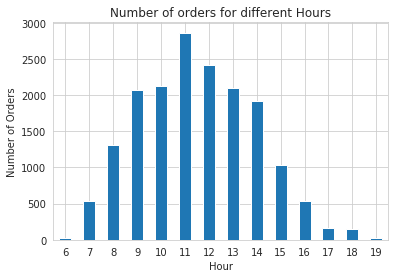

In [116]:
ax = data.groupby('InvoiceDate')['hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar')
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of orders for different Hours')
ax.set_xticklabels(range(6,21), rotation='horizontal')
plt.show()

**How many orders (per month)?**

In [110]:
data.groupby('InvoiceDate')['month'].unique().value_counts().sort_index()

[1]      942
[2]      967
[3]     1269
[4]     1080
[5]     1436
[6]     1315
[7]     1254
[8]     1211
[9]     1613
[10]    1792
[11]    2409
[12]    1998
Name: month, dtype: int64

**Make a plot about number of orders per month**

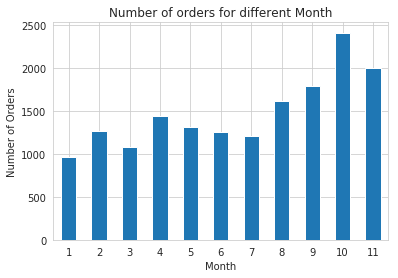

In [112]:
ax = data.groupby('InvoiceDate')['month'].unique().value_counts().iloc[:-1].sort_index().plot('bar')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of orders for different Month')
ax.set_xticklabels(range(1,13), rotation='horizontal')
plt.show()

**Top 10 items most sales**

In [143]:
most_sales = data.groupby('Description')['Quantity'].count().sort_values()

most_sales


Description
PINK BAROQUE FLOCK CANDLE HOLDER         1
BLACK CHERRY LIGHTS                      1
CRYSTAL CHANDELIER T-LIGHT HOLDER        1
BLACK 3 BEAD DROP EARRINGS               1
PINK POLKADOT KIDS BAG                   1
PINK FLOCK PHOTO FRAME                   1
MONTANA DIAMOND CLUSTER EARRINGS         1
BIRTHDAY BANNER TAPE                     1
UNION JACK HOT WATER BOTTLE              1
BIRD ON BRANCH CANVAS SCREEN             1
CURIOUS IMAGES SCRAP BOOK SET            1
BIG POLKADOT MUG                         1
RUBY GLASS CLUSTER NECKLACE              1
VINTAGE BEAD PINK JEWEL STAND            1
BELL HEART ANTIQUE GOLD                  1
BEADED LOVE HEART JEWELLERY SET          1
BLACK CHRISTMAS FLOCK DROPLET            1
CROCHET LILAC/RED BEAR KEYRING           1
GREEN DROP EARRINGS W BEAD CLUSTER       1
CROCHET DOG KEYRING                      1
PINK PAINTED KASHMIRI CHAIR              1
SCALLOP SHELL SOAP DISH                  1
BLOSSOM IMAGES SCRAP BOOK SET            1

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Country
Saudi Arabia               9
Bahrain                   17
Czech Republic            25
Brazil                    32
Lithuania                 35
Lebanon                   45
RSA                       58
European Community        60
United Arab Emirates      68
Malta                    112
Greece                   145
Canada                   151
USA                      179
Iceland                  182
Singapore                222
Unspecified              244
Israel                   248
Japan                    321
Poland                   330
Denmark                  380
Austria                  398
Sweden                   451
Cyprus                   614
Finland                  685
Channel Islands          748
Italy                    758
Norway                  1072
Australia               1185
Portugal                1462
Switzerland             1842
Belgium                 2031
Netherlands             2363
Spain                   2485
EIRE                    7238
France

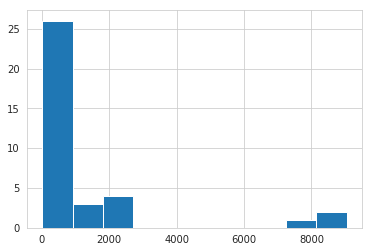

In [135]:
# Your code here

# What can you tell about this?
most_quantity = data.groupby('Country')['Quantity'].count().sort_values()
del most_quantity['United Kingdom']

# plot number of unique customers in each country (without UK)
print(most_quantity)
most_quantity.hist()



### You are awesome!!